In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# Creating data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

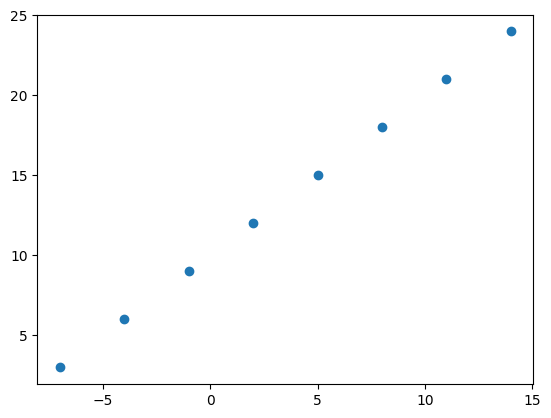

In [3]:
#@title
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)
plt.show()

In [4]:
X.shape

(8,)

In [5]:
y.shape

(8,)

In [6]:
X[0].shape

()

In [7]:
y[0].shape

()

X[0] and y[0]'s shapes are () this because these are scalar

In [8]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, 
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# axis = -1 given because we want the new dimension on the last position
# for this model we could have used axis=1; it would give same result
# but for general rule we used axis = -1
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 922ms/step - loss: 14.5872 - mae: 14.5872
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 14.4547 - mae: 14.4547
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 14.3222 - mae: 14.3222
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 14.1897 - mae: 14.1897
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 14.0572 - mae: 14.0572


In [9]:
model.predict([5])

1/1 [==============================] - 0s 235ms/step


array([[-0.6281374]], dtype=float32)

In [10]:
# make predictions
model.predict([17])

1/1 [==============================] - 0s 59ms/step


array([[-2.2556672]], dtype=float32)

# Improving model

In [14]:
tf.random.set_global_generator(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 486ms/step - loss: 18.2583 - mae: 18.2583
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 17.9770 - mae: 17.9770
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 17.6958 - mae: 17.6958
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 17.4145 - mae: 17.4145
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 17.1333 - mae: 17.1333
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 16.8520 - mae: 16.8520
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 16.5708 - mae: 16.5708
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 16.2895 - mae: 16.2895
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 16.0083 - mae: 16.0083
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 15.7270 - mae: 15.7270
Epoch 11/100
1/1 [==============================

In [15]:
model.predict([17.0])

1/1 [==============================] - 0s 72ms/step


array([[29.768656]], dtype=float32)

# Evaluating a model

**Creating a large dataset**

In [17]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [19]:
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

**Split data into train and test set**

In [20]:
len(X)

50

In [23]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

**Visualizing the data**

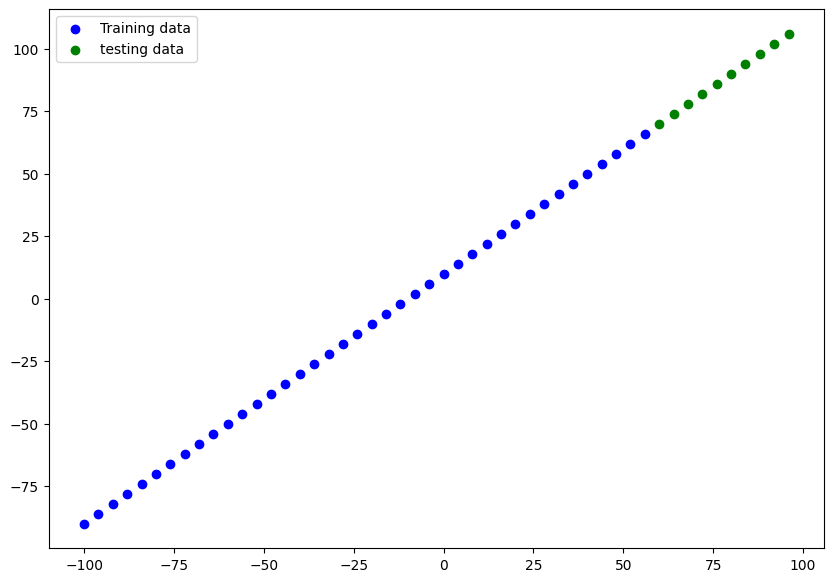

In [25]:
plt.figure(figsize=(10, 7))

plt.scatter(X_train, y_train, c='b', label='Training data')

plt.scatter(X_test, y_test, c='g', label='testing data')

plt.legend()
plt.show()

In [26]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics="mae")

**Visualizing the model**

In [27]:
model.summary()

ValueError: ignored

- *model is giving error, because we did not fit our model*
- *to solve this we can define the input shape
in the dense layer*

In [35]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])   # defining input shape
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [36]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [37]:
# tf.random.set_seed(42)

# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(3, input_shape=[1])
# ])

# model.compile(loss="mae",
#            optimizer=tf.keras.optimizers.SGD(),
#            metrics="mae")

In [38]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [42]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


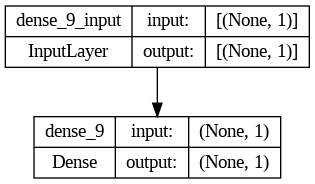

In [43]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

# Visualizing the predictions

In [44]:
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 330ms/step


In [46]:
y_preds

array([[ 74.661415],
       [ 79.55113 ],
       [ 84.44085 ],
       [ 89.33057 ],
       [ 94.22029 ],
       [ 99.11001 ],
       [103.999725],
       [108.88945 ],
       [113.77917 ],
       [118.668884]], dtype=float32)

In [49]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test,
                     test_labels=y_test, predictions=y_preds):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c='b', label="Training data")

  plt.scatter(test_data, test_labels, c='g', label="Testing data")

  plt.scatter(test_data, predictions, c='r', label="Predictions")

  plt.legend()
  plt.show()

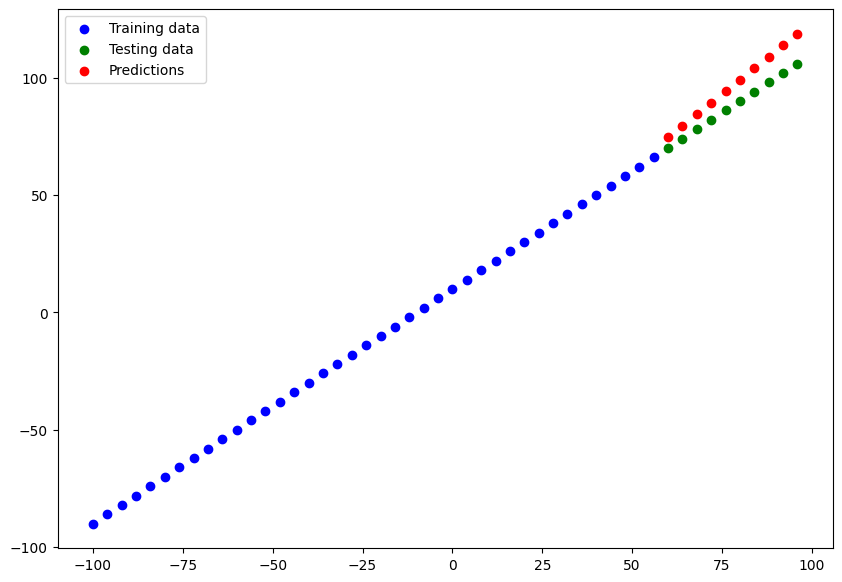

In [50]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test,
                     test_labels=y_test, predictions=y_preds)

# Evaluating predictions

In [51]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 178ms/step - loss: 8.6651 - mae: 8.6651


[8.665148735046387, 8.665148735046387]

In [53]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([14.403151 , 11.779547 , 10.3118305, 10.       , 10.888117 ,
       13.066005 , 16.39978  , 20.88945  , 25.77917  , 30.668884 ],
      dtype=float32)>

*'mae' should have given one value, instead its giving list of values*

In [54]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [56]:
y_test = y_test.reshape(10,1)
y_test.shape

(10, 1)

In [57]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 4.661415 ,  5.551132 ,  6.4408493,  7.3305664,  8.220291 ,
        9.110008 ,  9.999725 , 10.88945  , 11.779167 , 12.668884 ],
      dtype=float32)>

In [58]:
y_test = y_test.reshape(10)
y_preds = y_preds.reshape(10)

In [59]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=8.665149>

*Now "mae" worked*

In [60]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds)
mse
     

<tf.Tensor: shape=(), dtype=float32, numpy=81.6155>